In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Read the links.csv file
links_df = pd.read_csv('/content/drive/MyDrive/CMPE_255_DataPrep/Task1/ml-latest-small/links.csv')

# Read the movies.csv file
movies_df = pd.read_csv('/content/drive/MyDrive/CMPE_255_DataPrep/Task1/ml-latest-small/movies.csv')

# Read the ratings.csv file
ratings_df = pd.read_csv('/content/drive/MyDrive/CMPE_255_DataPrep/Task1/ml-latest-small/ratings.csv')

# Read the tags.csv file
tags_df = pd.read_csv('/content/drive/MyDrive/CMPE_255_DataPrep/Task1/ml-latest-small/tags.csv')


In [ ]:
# Merge the links.csv and movies.csv files on the movie_id column
merged_df = links_df.merge(movies_df, on='movieId')

# Merge the ratings.csv file with the merged DataFrame on the movie_id column
merged_df = merged_df.merge(ratings_df, on='movieId')

# Merge the tags.csv file with the merged DataFrame on the movie_id column
merged_df = merged_df.merge(tags_df, on='movieId')


In [ ]:
merged_df

,movieId,imdbId,tmdbId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...,...,...
233208,187595,3778644,348350.0,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


In [ ]:
# Print the data types and shapes of all variables
merged_df.dtypes
merged_df.shape


(233213, 11)

In [ ]:
# Calculate descriptive statistics for all numerical variables
merged_df.describe()


,movieId,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,timestamp_y
count,233213.000000,2.332130e+05,233213.000000,233213.000000,233213.000000,2.332130e+05,233213.000000,2.332130e+05
mean,12319.999443,2.610632e+05,9378.277742,309.688191,3.966535,1.213524e+09,470.683564,1.384774e+09
std,28243.919401,4.414411e+05,36943.139800,178.206387,0.968637,2.250448e+08,153.329632,1.534621e+08
min,1.000000,1.234900e+04,11.000000,1.000000,0.500000,8.281246e+08,2.000000,1.137179e+09
25%,296.000000,1.103570e+05,278.000000,156.000000,3.500000,1.017365e+09,424.000000,1.242494e+09
50%,1198.000000,1.109120e+05,680.000000,309.000000,4.000000,1.217325e+09,477.000000,1.457901e+09
75%,4638.000000,1.724950e+05,1892.000000,460.000000,5.000000,1.443201e+09,599.000000,1.498457e+09
max,193565.000000,5.580390e+06,503475.000000,610.000000,5.000000,1.537799e+09,610.000000,1.537099e+09


Text(0, 0.5, 'Count')

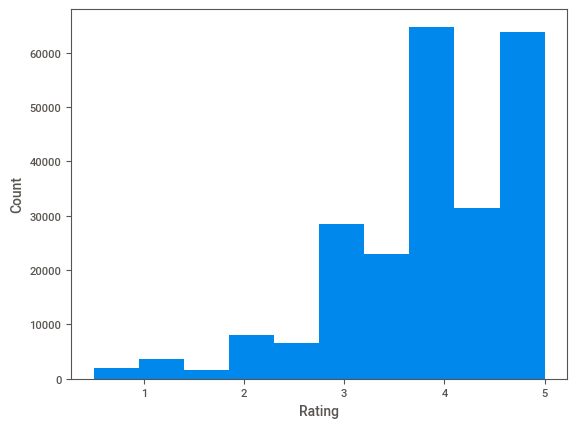

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram of the ratings
plt.hist(merged_df['rating'])
plt.xlabel('Rating')
plt.ylabel('Count')

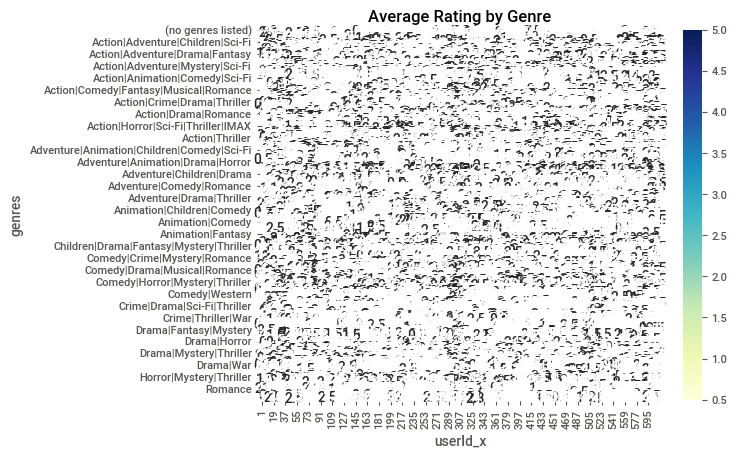

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pivot table to reshape the data for the heatmap
pivot_table = merged_df.pivot_table(index='genres', columns='userId_x', values='rating', aggfunc='mean')

# Create a heatmap of the average rating for each genre
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Average Rating by Genre')
plt.show()


In [ ]:
pip install sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
report = sv.analyze(merged_df)
report.show_html('/content/drive/MyDrive/CMPE_255_DataPrep/Task1/ml-latest-small/sweetviz_report.html', open_browser=True, layout='widescreen', scale=1.0)

                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/CMPE_255_DataPrep/Task1/ml-latest-small/sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
movie = movies_df
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
# Check unique movie title
movie["title"].unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       ..., 'Flint (2017)', 'Bungo Stray Dogs: Dead Apple (2018)',
       'Andrew Dice Clay: Dice Rules (1991)'], dtype=object)

In [ ]:
# create ne coloumn name as year from title
movie["Year"] = movie.title.str.extract("(\(\d\d\d\d\))" ,expand = True)
movie["Year"]

0       (1995)
1       (1995)
2       (1995)
3       (1995)
4       (1995)
         ...  
9737    (2017)
9738    (2017)
9739    (2017)
9740    (2018)
9741    (1991)
Name: Year, Length: 9742, dtype: object

In [ ]:
# Removing extra brakets
movie["Year"] = movie.title.str.extract("(\d\d\d\d)" ,expand = True)
movie["Year"]

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
9737    2017
9738    2017
9739    2017
9740    2018
9741    1991
Name: Year, Length: 9742, dtype: object

In [ ]:
# replace year and add whitespaces
movie["title"]= movie.title.str.replace("(\(\d\d\d\d\))","")
movie

<ipython-input-81-4760a24949fd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  movie["title"]= movie.title.str.replace("(\(\d\d\d\d\))","")


,movieId,title,genres,Year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017
9739,193585,Flint,Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,2018


In [ ]:
# Removing extra spaces from begining and ending
movie["title"]= movie["title"].apply(lambda x: x.strip())
movie.head(3)

,movieId,title,genres,Year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995


In [ ]:
# apply lower to the genres
movie["genres"] = movie["genres"].apply(lambda x:x.lower())
movie

,movieId,title,genres,Year
0,1,Toy Story,adventure|animation|children|comedy|fantasy,1995
1,2,Jumanji,adventure|children|fantasy,1995
2,3,Grumpier Old Men,comedy|romance,1995
3,4,Waiting to Exhale,comedy|drama|romance,1995
4,5,Father of the Bride Part II,comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,action|animation|comedy|fantasy,2017
9738,193583,No Game No Life: Zero,animation|comedy|fantasy,2017
9739,193585,Flint,drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple,action|animation,2018


In [ ]:
# import tags file
tag = pd.read_csv("/content/drive/MyDrive/CMPE_255_DataPrep/Task1/ml-latest-small/tags.csv")
tag.head(3)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992


In [ ]:
# merge  movie and tag file
df = pd.merge(movie,tag,on="movieId",how="left")
df.head(3)

,movieId,title,genres,Year,userId,tag,timestamp
0,1,Toy Story,adventure|animation|children|comedy|fantasy,1995,336.0,pixar,1.139046e+09
1,1,Toy Story,adventure|animation|children|comedy|fantasy,1995,474.0,pixar,1.137207e+09
2,1,Toy Story,adventure|animation|children|comedy|fantasy,1995,567.0,fun,1.525286e+09


In [ ]:
# create metadata by adding genres and tag
df.fillna("", inplace =True)
df = pd.DataFrame(df.groupby("movieId")["tag"].apply(lambda x: "%s" % " ".join(x)))
df

,tag
movieId,
1,pixar pixar fun
2,fantasy magic board game Robin Williams game
3,moldy old
4,
5,pregnancy remake
...,...
193581,
193583,
193585,


In [ ]:
#merge movie and df dataset
new_df = pd.merge(movie,df ,on = "movieId" ,how="left")
new_df["metadata"] = new_df[["tag","genres"]].apply(lambda x: " ".join(x),axis=1)
new_df["metadata"]


0       pixar pixar fun adventure|animation|children|c...
1       fantasy magic board game Robin Williams game a...
2                                moldy old comedy|romance
3                                    comedy|drama|romance
4                                 pregnancy remake comedy
                              ...                        
9737                      action|animation|comedy|fantasy
9738                             animation|comedy|fantasy
9739                                                drama
9740                                     action|animation
9741                                               comedy
Name: metadata, Length: 9742, dtype: object

In [ ]:
# store movieId title metadata year in new_df
new_df = new_df[["movieId","title","metadata","Year"]]
new_df

,movieId,title,metadata,Year
0,1,Toy Story,pixar pixar fun adventure|animation|children|c...,1995
1,2,Jumanji,fantasy magic board game Robin Williams game a...,1995
2,3,Grumpier Old Men,moldy old comedy|romance,1995
3,4,Waiting to Exhale,comedy|drama|romance,1995
4,5,Father of the Bride Part II,pregnancy remake comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,action|animation|comedy|fantasy,2017
9738,193583,No Game No Life: Zero,animation|comedy|fantasy,2017
9739,193585,Flint,drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple,action|animation,2018


In [ ]:
# split |  from metadata
new_df["metadata"]=new_df.metadata.str.split("|")
new_df

,movieId,title,metadata,Year
0,1,Toy Story,"[pixar pixar fun adventure, animation, childre...",1995
1,2,Jumanji,[fantasy magic board game Robin Williams game ...,1995
2,3,Grumpier Old Men,"[moldy old comedy, romance]",1995
3,4,Waiting to Exhale,"[ comedy, drama, romance]",1995
4,5,Father of the Bride Part II,[pregnancy remake comedy],1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,"[ action, animation, comedy, fantasy]",2017
9738,193583,No Game No Life: Zero,"[ animation, comedy, fantasy]",2017
9739,193585,Flint,[ drama],2017
9740,193587,Bungo Stray Dogs: Dead Apple,"[ action, animation]",2018


In [ ]:
new_df.shape

(9742, 4)

In [ ]:
# Remove all extra spaces from metadata column
new_df['metadata']=new_df['metadata'].apply(lambda x:[i.replace(" ","") for i in x])
new_df

,movieId,title,metadata,Year
0,1,Toy Story,"[pixarpixarfunadventure, animation, children, ...",1995
1,2,Jumanji,[fantasymagicboardgameRobinWilliamsgameadventu...,1995
2,3,Grumpier Old Men,"[moldyoldcomedy, romance]",1995
3,4,Waiting to Exhale,"[comedy, drama, romance]",1995
4,5,Father of the Bride Part II,[pregnancyremakecomedy],1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,"[action, animation, comedy, fantasy]",2017
9738,193583,No Game No Life: Zero,"[animation, comedy, fantasy]",2017
9739,193585,Flint,[drama],2017
9740,193587,Bungo Stray Dogs: Dead Apple,"[action, animation]",2018


In [ ]:
# join metadata spaces
new_df['metadata']=new_df['metadata'].apply(lambda x:" ".join(x))
new_df


,movieId,title,metadata,Year
0,1,Toy Story,pixarpixarfunadventure animation children come...,1995
1,2,Jumanji,fantasymagicboardgameRobinWilliamsgameadventur...,1995
2,3,Grumpier Old Men,moldyoldcomedy romance,1995
3,4,Waiting to Exhale,comedy drama romance,1995
4,5,Father of the Bride Part II,pregnancyremakecomedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,action animation comedy fantasy,2017
9738,193583,No Game No Life: Zero,animation comedy fantasy,2017
9739,193585,Flint,drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple,action animation,2018


In [ ]:
# check new_df
new_df

,movieId,title,metadata,Year
0,1,Toy Story,pixarpixarfunadventure animation children come...,1995
1,2,Jumanji,fantasymagicboardgameRobinWilliamsgameadventur...,1995
2,3,Grumpier Old Men,moldyoldcomedy romance,1995
3,4,Waiting to Exhale,comedy drama romance,1995
4,5,Father of the Bride Part II,pregnancyremakecomedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,action animation comedy fantasy,2017
9738,193583,No Game No Life: Zero,animation comedy fantasy,2017
9739,193585,Flint,drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple,action animation,2018


In [ ]:
# Find indexing position
x = new_df[new_df["title"]=="Jumanji"].index
x

Int64Index([1], dtype='int64')

In [ ]:
# check 0th location of new_df
new_df['metadata'][0]

'pixarpixarfunadventure animation children comedy fantasy'

In [ ]:
new_df.values

array([[1, 'Toy Story',
        'pixarpixarfunadventure animation children comedy fantasy',
        '1995'],
       [2, 'Jumanji',
        'fantasymagicboardgameRobinWilliamsgameadventure children fantasy',
        '1995'],
       [3, 'Grumpier Old Men', 'moldyoldcomedy romance', '1995'],
       ...,
       [193585, 'Flint', 'drama', '2017'],
       [193587, 'Bungo Stray Dogs: Dead Apple', 'action animation',
        '2018'],
       [193609, 'Andrew Dice Clay: Dice Rules', 'comedy', '1991']],
      dtype=object)

In [ ]:
type(new_df)

pandas.core.frame.DataFrame

In [ ]:
new_df.shape

(9742, 4)

In [ ]:
# for create vector using TfidfVectorizer library
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(stop_words='english')
new_df['metadata'] = new_df['metadata'].fillna('')

In [ ]:
tfv_matrix = tfid.fit_transform(new_df['metadata'])
tfv_matrix

<9742x1360 sparse matrix of type '<class 'numpy.float64'>'
	with 23318 stored elements in Compressed Sparse Row format>

In [ ]:
# check shape of matrix
tfv_matrix.shape

(9742, 1360)

In [ ]:
# import linear_kernel from sklearn
from sklearn.metrics.pairwise import linear_kernel
### compute the sigmoid kernel
sig = linear_kernel(tfv_matrix, tfv_matrix)


In [ ]:
# store index of title
indices = pd.Series(new_df.index, index=new_df["title"])

In [ ]:
indices

title
Toy Story                                0
Jumanji                                  1
Grumpier Old Men                         2
Waiting to Exhale                        3
Father of the Bride Part II              4
                                      ... 
Black Butler: Book of the Atlantic    9737
No Game No Life: Zero                 9738
Flint                                 9739
Bungo Stray Dogs: Dead Apple          9740
Andrew Dice Clay: Dice Rules          9741
Length: 9742, dtype: int64

In [ ]:
indices["Toy Story"]

0

In [ ]:
def recomend_movie(title,cosine_sin=sig):
    idx = indices[title]
    sim_scores = enumerate(cosine_sin[idx])
    sim_scores = sorted(sim_scores, key=lambda x : x[1], reverse=True)
    # how many movies will recomend is set here
    sim_scores = sim_scores[1:10]
    movies_indices = [i[0] for i in sim_scores]
    movie_rec = new_df['title'].iloc[movies_indices].reset_index
    print(movie_rec)

In [ ]:
recomend_movie("Flint")

<bound method Series.reset_index of 51                       Home for the Holidays
105                   Boys of St. Vincent, The
121                  Awfully Big Adventure, An
127          Beauty of the Day (Belle de jour)
155                                      Nadja
163                                  Showgirls
177                         White Man's Burden
179                      Browning Version, The
181    Burnt by the Sun (Utomlyonnye solntsem)
Name: title, dtype: object>
